###### Questions?

1. 585 as threshold for NaN data
2. Interpolate for the rest of the data for PCA
    https://stackoverflow.com/questions/29420737/pca-with-missing-values-in-python 
3. 58 rows for NaN data in ESS 


In [465]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition
from ppca import PPCA


#### Loading data files - Features and Patients 

- laoding excel sheets
- renaming columns
- analyzing basic data information and distribution

In [366]:
features_df = pd.DataFrame(pd.read_excel("features_data.xlsx")) 
patients_df = pd.DataFrame(pd.read_excel("patients_data.xlsx")) 

def info_df(df):
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print(df.columns)
    df.head(10)

In [367]:
features_df = features_df.rename(columns = {"id":"ID"})
info_df(features_df)

Number of rows: 1509
Number of columns: 781
Index(['ID', 'mss_c3_spec_0p33_2p33_DxSpltMxd',
       'mss_c3_spec_2p67_6p33_DxSpltMxd', 'mss_c3_spec_7p33_12p0_DxSpltMxd',
       'mss_c3_spec_12p33_14p0_DxSpltMxd', 'mss_c3_spec_14p33_20p0_DxSpltMxd',
       'mss_c3_spec_20p3_35p0_DxSpltMxd', 'mss_c3_spec_gt35_DxSpltMxd',
       'mss_c4_spec_0p33_2p33_DxSpltMxd', 'mss_c4_spec_2p67_6p33_DxSpltMxd',
       ...
       'mssBetaPwrC3Rel_1stSpltMxd', 'mssBetaPwrC4Rel_1stSpltMxd',
       'mssBetaPwrRelC3C4av_1stSpltMxd', 'mssGammaPwrAbsC3C4av_1stSpltMxd',
       'mssGammaPwrC3Rel_1stSpltMxd', 'mssGammaPwrC4Rel_1stSpltMxd',
       'mssGammaPwrRelC3C4av_1stSpltMxd', 'mssDAratioC3_1stSpltMxd',
       'mssDAratioC4_1stSpltMxd', 'mssDAratioC3C4av_1stSpltMxd'],
      dtype='object', length=781)


In [368]:
patients_df.ID.nunique()

841

In [369]:
features_df.ID.nunique()

1509

In [370]:
features_df.head(10)

,ID,mss_c3_spec_0p33_2p33_DxSpltMxd,mss_c3_spec_2p67_6p33_DxSpltMxd,mss_c3_spec_7p33_12p0_DxSpltMxd,mss_c3_spec_12p33_14p0_DxSpltMxd,mss_c3_spec_14p33_20p0_DxSpltMxd,mss_c3_spec_20p3_35p0_DxSpltMxd,mss_c3_spec_gt35_DxSpltMxd,mss_c4_spec_0p33_2p33_DxSpltMxd,mss_c4_spec_2p67_6p33_DxSpltMxd,...,mssBetaPwrC3Rel_1stSpltMxd,mssBetaPwrC4Rel_1stSpltMxd,mssBetaPwrRelC3C4av_1stSpltMxd,mssGammaPwrAbsC3C4av_1stSpltMxd,mssGammaPwrC3Rel_1stSpltMxd,mssGammaPwrC4Rel_1stSpltMxd,mssGammaPwrRelC3C4av_1stSpltMxd,mssDAratioC3_1stSpltMxd,mssDAratioC4_1stSpltMxd,mssDAratioC3C4av_1stSpltMxd
0,10002,41.0,7.6,3.1,0.6,1.2,1.7,0.8,NaN,NaN,...,9.862,NaN,9.8620,1.90,3.287,NaN,3.2870,10.806,NaN,10.8060
1,10003,64.0,16.1,8.9,1.5,1.7,0.9,0.2,67.0,17.7,...,2.487,2.696,2.5915,0.20,0.178,0.163,0.1705,8.553,8.267,8.4100
2,10004,42.0,6.9,6.1,0.9,1.9,1.6,0.4,52.0,8.3,...,5.331,4.796,5.0635,1.20,0.720,2.278,1.4990,7.561,8.868,8.2145
3,10005,61.0,13.0,9.0,1.1,2.1,2.5,0.9,79.0,15.2,...,5.068,3.936,4.5020,1.05,1.072,0.803,0.9375,6.990,10.917,8.9535
4,10006,96.0,13.9,5.1,1.0,2.0,2.1,1.0,122.0,16.3,...,3.002,2.395,2.6985,1.55,0.808,0.885,0.8465,24.310,26.932,25.6210
5,10007,37.0,15.3,6.5,1.3,2.0,1.6,0.3,35.0,15.9,...,5.775,5.828,5.8015,0.30,0.456,0.460,0.4580,5.701,5.304,5.5025
6,10008,87.0,18.0,17.3,1.6,2.3,1.3,0.3,83.0,17.9,...,2.447,2.848,2.6475,0.45,0.251,0.316,0.2835,5.493,5.175,5.3340
7,10009,82.0,19.3,12.4,3.0,2.1,1.7,0.4,81.0,18.5,...,3.026,2.964,2.9950,0.85,0.403,0.709,0.5560,7.433,8.890,8.1615
8,10010,31.0,6.0,2.6,0.8,1.2,1.1,0.2,33.0,5.9,...,5.081,4.312,4.6965,0.25,0.610,0.411,0.5105,13.444,14.600,14.0220
9,10011,49.0,17.0,10.4,3.0,4.0,4.3,0.4,46.0,16.0,...,6.592,6.823,6.7075,0.40,0.371,0.390,0.3805,5.973,5.750,5.8615


In [371]:
info_df(patients_df)

Number of rows: 841
Number of columns: 16
Index(['ID', 'Cohort', 'Age', 'Sex', 'AHI', 'BMI', 'ISI', 'Moca', 'ESS', 'HB',
       'TDHR', 'Median_Delta_Ratio_AB_C3', 'Median_Theta_Ratio_AB_C3',
       'Median_Alpha_Ratio_AB_C3', 'Median_Beta_Ratio_AB_C3',
       'Median_Gamma_Ratio_AB_C3'],
      dtype='object')


In [372]:
patients_df.head(10)

,ID,Cohort,Age,Sex,AHI,BMI,ISI,Moca,ESS,HB,TDHR,Median_Delta_Ratio_AB_C3,Median_Theta_Ratio_AB_C3,Median_Alpha_Ratio_AB_C3,Median_Beta_Ratio_AB_C3,Median_Gamma_Ratio_AB_C3
0,10002,1,65.0,1.0,16.0,30.80,14.0,25.0,14.0,24.205749,4.087719,2.491958,1.085985,1.533651,1.985885,3.568773
1,10003,1,52.0,1.0,2.2,24.84,10.0,30.0,12.0,2.677810,3.888889,2.604253,1.094772,1.359091,2.888425,18.051979
2,10004,1,72.0,1.0,39.6,30.07,NaN,NaN,NaN,60.420014,3.295858,1.891987,1.308737,1.670836,2.146112,5.203667
3,10005,1,82.0,1.0,7.5,26.40,13.0,NaN,8.0,9.945153,4.878788,5.302324,1.922548,3.442275,6.502162,26.357007
4,10006,1,49.0,2.0,17.8,45.55,11.0,28.0,5.0,21.242385,4.990385,1.940231,1.171179,1.824343,3.600354,10.678846
5,10007,1,53.0,1.0,15.2,24.37,NaN,25.0,NaN,13.023488,6.719054,2.180182,1.603899,2.215481,3.116411,12.352883
6,10008,1,53.0,2.0,9.5,39.08,18.0,25.0,14.0,4.852836,2.262532,2.367012,1.300177,1.392243,1.698305,5.347779
7,10009,1,41.0,2.0,15.5,52.07,11.0,29.0,10.0,29.597175,4.741935,1.786464,1.080367,1.301603,2.699692,10.100621
8,10010,1,64.0,1.0,27.7,23.77,NaN,24.0,12.0,55.849307,6.773481,2.068044,1.032437,1.928310,3.302080,15.393079
9,10011,1,52.0,1.0,14.1,28.73,10.0,26.0,5.0,34.762092,8.383249,1.643564,1.257064,2.118565,1.875536,4.158595


### Merging Dataframes

- Patients and features data wherever the patiend id matches the feature id - patient wise data distribution
- Analyzing merged data  

In [373]:
final_df = pd.merge(features_df, patients_df, on="ID", how="right")

In [374]:
final_df.shape

(841, 796)

In [375]:
patients_df.ID.nunique()

841

In [376]:
features_df.ID.nunique()

1509

In [377]:
info_df(final_df)

Number of rows: 841
Number of columns: 796
Index(['ID', 'mss_c3_spec_0p33_2p33_DxSpltMxd',
       'mss_c3_spec_2p67_6p33_DxSpltMxd', 'mss_c3_spec_7p33_12p0_DxSpltMxd',
       'mss_c3_spec_12p33_14p0_DxSpltMxd', 'mss_c3_spec_14p33_20p0_DxSpltMxd',
       'mss_c3_spec_20p3_35p0_DxSpltMxd', 'mss_c3_spec_gt35_DxSpltMxd',
       'mss_c4_spec_0p33_2p33_DxSpltMxd', 'mss_c4_spec_2p67_6p33_DxSpltMxd',
       ...
       'ISI', 'Moca', 'ESS', 'HB', 'TDHR', 'Median_Delta_Ratio_AB_C3',
       'Median_Theta_Ratio_AB_C3', 'Median_Alpha_Ratio_AB_C3',
       'Median_Beta_Ratio_AB_C3', 'Median_Gamma_Ratio_AB_C3'],
      dtype='object', length=796)


In [378]:
final_df.ID.nunique()

841

In [379]:
final_df.head(10)

,ID,mss_c3_spec_0p33_2p33_DxSpltMxd,mss_c3_spec_2p67_6p33_DxSpltMxd,mss_c3_spec_7p33_12p0_DxSpltMxd,mss_c3_spec_12p33_14p0_DxSpltMxd,mss_c3_spec_14p33_20p0_DxSpltMxd,mss_c3_spec_20p3_35p0_DxSpltMxd,mss_c3_spec_gt35_DxSpltMxd,mss_c4_spec_0p33_2p33_DxSpltMxd,mss_c4_spec_2p67_6p33_DxSpltMxd,...,ISI,Moca,ESS,HB,TDHR,Median_Delta_Ratio_AB_C3,Median_Theta_Ratio_AB_C3,Median_Alpha_Ratio_AB_C3,Median_Beta_Ratio_AB_C3,Median_Gamma_Ratio_AB_C3
0,10002,41.0,7.6,3.1,0.6,1.2,1.7,0.8,NaN,NaN,...,14.0,25.0,14.0,24.205749,4.087719,2.491958,1.085985,1.533651,1.985885,3.568773
1,10003,64.0,16.1,8.9,1.5,1.7,0.9,0.2,67.0,17.7,...,10.0,30.0,12.0,2.677810,3.888889,2.604253,1.094772,1.359091,2.888425,18.051979
2,10004,42.0,6.9,6.1,0.9,1.9,1.6,0.4,52.0,8.3,...,NaN,NaN,NaN,60.420014,3.295858,1.891987,1.308737,1.670836,2.146112,5.203667
3,10005,61.0,13.0,9.0,1.1,2.1,2.5,0.9,79.0,15.2,...,13.0,NaN,8.0,9.945153,4.878788,5.302324,1.922548,3.442275,6.502162,26.357007
4,10006,96.0,13.9,5.1,1.0,2.0,2.1,1.0,122.0,16.3,...,11.0,28.0,5.0,21.242385,4.990385,1.940231,1.171179,1.824343,3.600354,10.678846
5,10007,37.0,15.3,6.5,1.3,2.0,1.6,0.3,35.0,15.9,...,NaN,25.0,NaN,13.023488,6.719054,2.180182,1.603899,2.215481,3.116411,12.352883
6,10008,87.0,18.0,17.3,1.6,2.3,1.3,0.3,83.0,17.9,...,18.0,25.0,14.0,4.852836,2.262532,2.367012,1.300177,1.392243,1.698305,5.347779
7,10009,82.0,19.3,12.4,3.0,2.1,1.7,0.4,81.0,18.5,...,11.0,29.0,10.0,29.597175,4.741935,1.786464,1.080367,1.301603,2.699692,10.100621
8,10010,31.0,6.0,2.6,0.8,1.2,1.1,0.2,33.0,5.9,...,NaN,24.0,12.0,55.849307,6.773481,2.068044,1.032437,1.928310,3.302080,15.393079
9,10011,49.0,17.0,10.4,3.0,4.0,4.3,0.4,46.0,16.0,...,10.0,26.0,5.0,34.762092,8.383249,1.643564,1.257064,2.118565,1.875536,4.158595


In [380]:
final_df = final_df.drop_duplicates()

# No duplicates found in the merged dataframe 
info_df(final_df)

Number of rows: 841
Number of columns: 796
Index(['ID', 'mss_c3_spec_0p33_2p33_DxSpltMxd',
       'mss_c3_spec_2p67_6p33_DxSpltMxd', 'mss_c3_spec_7p33_12p0_DxSpltMxd',
       'mss_c3_spec_12p33_14p0_DxSpltMxd', 'mss_c3_spec_14p33_20p0_DxSpltMxd',
       'mss_c3_spec_20p3_35p0_DxSpltMxd', 'mss_c3_spec_gt35_DxSpltMxd',
       'mss_c4_spec_0p33_2p33_DxSpltMxd', 'mss_c4_spec_2p67_6p33_DxSpltMxd',
       ...
       'ISI', 'Moca', 'ESS', 'HB', 'TDHR', 'Median_Delta_Ratio_AB_C3',
       'Median_Theta_Ratio_AB_C3', 'Median_Alpha_Ratio_AB_C3',
       'Median_Beta_Ratio_AB_C3', 'Median_Gamma_Ratio_AB_C3'],
      dtype='object', length=796)


### ESS Prediction (Input Features Only)
Extracted the input features from features_data.xlsx and the output feature (ESS) from patients_data.xlsx after creating a merged dataframe - final_df

In [381]:
input_df_isi = final_df.iloc[:,0:781]
input_df_isi["ESS"] = final_df["ESS"]
input_df_isi.head(10)

,ID,mss_c3_spec_0p33_2p33_DxSpltMxd,mss_c3_spec_2p67_6p33_DxSpltMxd,mss_c3_spec_7p33_12p0_DxSpltMxd,mss_c3_spec_12p33_14p0_DxSpltMxd,mss_c3_spec_14p33_20p0_DxSpltMxd,mss_c3_spec_20p3_35p0_DxSpltMxd,mss_c3_spec_gt35_DxSpltMxd,mss_c4_spec_0p33_2p33_DxSpltMxd,mss_c4_spec_2p67_6p33_DxSpltMxd,...,mssBetaPwrC4Rel_1stSpltMxd,mssBetaPwrRelC3C4av_1stSpltMxd,mssGammaPwrAbsC3C4av_1stSpltMxd,mssGammaPwrC3Rel_1stSpltMxd,mssGammaPwrC4Rel_1stSpltMxd,mssGammaPwrRelC3C4av_1stSpltMxd,mssDAratioC3_1stSpltMxd,mssDAratioC4_1stSpltMxd,mssDAratioC3C4av_1stSpltMxd,ESS
0,10002,41.0,7.6,3.1,0.6,1.2,1.7,0.8,NaN,NaN,...,NaN,9.8620,1.90,3.287,NaN,3.2870,10.806,NaN,10.8060,14.0
1,10003,64.0,16.1,8.9,1.5,1.7,0.9,0.2,67.0,17.7,...,2.696,2.5915,0.20,0.178,0.163,0.1705,8.553,8.267,8.4100,12.0
2,10004,42.0,6.9,6.1,0.9,1.9,1.6,0.4,52.0,8.3,...,4.796,5.0635,1.20,0.720,2.278,1.4990,7.561,8.868,8.2145,NaN
3,10005,61.0,13.0,9.0,1.1,2.1,2.5,0.9,79.0,15.2,...,3.936,4.5020,1.05,1.072,0.803,0.9375,6.990,10.917,8.9535,8.0
4,10006,96.0,13.9,5.1,1.0,2.0,2.1,1.0,122.0,16.3,...,2.395,2.6985,1.55,0.808,0.885,0.8465,24.310,26.932,25.6210,5.0
5,10007,37.0,15.3,6.5,1.3,2.0,1.6,0.3,35.0,15.9,...,5.828,5.8015,0.30,0.456,0.460,0.4580,5.701,5.304,5.5025,NaN
6,10008,87.0,18.0,17.3,1.6,2.3,1.3,0.3,83.0,17.9,...,2.848,2.6475,0.45,0.251,0.316,0.2835,5.493,5.175,5.3340,14.0
7,10009,82.0,19.3,12.4,3.0,2.1,1.7,0.4,81.0,18.5,...,2.964,2.9950,0.85,0.403,0.709,0.5560,7.433,8.890,8.1615,10.0
8,10010,31.0,6.0,2.6,0.8,1.2,1.1,0.2,33.0,5.9,...,4.312,4.6965,0.25,0.610,0.411,0.5105,13.444,14.600,14.0220,12.0
9,10011,49.0,17.0,10.4,3.0,4.0,4.3,0.4,46.0,16.0,...,6.823,6.7075,0.40,0.371,0.390,0.3805,5.973,5.750,5.8615,5.0


In [382]:
info_df(input_df_isi)

Number of rows: 841
Number of columns: 782
Index(['ID', 'mss_c3_spec_0p33_2p33_DxSpltMxd',
       'mss_c3_spec_2p67_6p33_DxSpltMxd', 'mss_c3_spec_7p33_12p0_DxSpltMxd',
       'mss_c3_spec_12p33_14p0_DxSpltMxd', 'mss_c3_spec_14p33_20p0_DxSpltMxd',
       'mss_c3_spec_20p3_35p0_DxSpltMxd', 'mss_c3_spec_gt35_DxSpltMxd',
       'mss_c4_spec_0p33_2p33_DxSpltMxd', 'mss_c4_spec_2p67_6p33_DxSpltMxd',
       ...
       'mssBetaPwrC4Rel_1stSpltMxd', 'mssBetaPwrRelC3C4av_1stSpltMxd',
       'mssGammaPwrAbsC3C4av_1stSpltMxd', 'mssGammaPwrC3Rel_1stSpltMxd',
       'mssGammaPwrC4Rel_1stSpltMxd', 'mssGammaPwrRelC3C4av_1stSpltMxd',
       'mssDAratioC3_1stSpltMxd', 'mssDAratioC4_1stSpltMxd',
       'mssDAratioC3C4av_1stSpltMxd', 'ESS'],
      dtype='object', length=782)


Analyzing the Number of NAN/Null values for each patient based on ID

In [383]:
0.80*780

624.0

In [384]:
input_df_isi.shape

(841, 782)

In [385]:
def remove_nan_row(num,df):
    row_nan_count_method3 = df.apply(lambda x: x.isna().sum(), axis=1)
    indices = []
    count = 0

    for index in range(len(row_nan_count_method3)):
        if row_nan_count_method3[index] > num:
            count += 1
            indices.append(index)
    
    print(count)
    
    return indices

# 0.80*780 = 624 (585 as an approx.)
indices = remove_nan_row(585,input_df_isi)

df = input_df_isi.drop(input_df_isi.index[indices]).reset_index(drop=True)

info_df(df)

65
Number of rows: 776
Number of columns: 782
Index(['ID', 'mss_c3_spec_0p33_2p33_DxSpltMxd',
       'mss_c3_spec_2p67_6p33_DxSpltMxd', 'mss_c3_spec_7p33_12p0_DxSpltMxd',
       'mss_c3_spec_12p33_14p0_DxSpltMxd', 'mss_c3_spec_14p33_20p0_DxSpltMxd',
       'mss_c3_spec_20p3_35p0_DxSpltMxd', 'mss_c3_spec_gt35_DxSpltMxd',
       'mss_c4_spec_0p33_2p33_DxSpltMxd', 'mss_c4_spec_2p67_6p33_DxSpltMxd',
       ...
       'mssBetaPwrC4Rel_1stSpltMxd', 'mssBetaPwrRelC3C4av_1stSpltMxd',
       'mssGammaPwrAbsC3C4av_1stSpltMxd', 'mssGammaPwrC3Rel_1stSpltMxd',
       'mssGammaPwrC4Rel_1stSpltMxd', 'mssGammaPwrRelC3C4av_1stSpltMxd',
       'mssDAratioC3_1stSpltMxd', 'mssDAratioC4_1stSpltMxd',
       'mssDAratioC3C4av_1stSpltMxd', 'ESS'],
      dtype='object', length=782)


In [386]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 782 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    ID                                        int64  
 1    mss_c3_spec_0p33_2p33_DxSpltMxd           float64
 2    mss_c3_spec_2p67_6p33_DxSpltMxd           float64
 3    mss_c3_spec_7p33_12p0_DxSpltMxd           float64
 4    mss_c3_spec_12p33_14p0_DxSpltMxd          float64
 5    mss_c3_spec_14p33_20p0_DxSpltMxd          float64
 6    mss_c3_spec_20p3_35p0_DxSpltMxd           float64
 7    mss_c3_spec_gt35_DxSpltMxd                float64
 8    mss_c4_spec_0p33_2p33_DxSpltMxd           float64
 9    mss_c4_spec_2p67_6p33_DxSpltMxd           float64
 10   mss_c4_spec_7p33_12p0_DxSpltMxd           float64
 11   mss_c4_spec_12p33_14p0_DxSpltMxd          float64
 12   mss_c4_spec_14p33_20p0_DxSpltMxd          float64
 13   mss_c4_spec_20p3_35p0_DxSpltMxd           float6

In [387]:
df.shape

(776, 782)

### Converting column names into one hot encoding 

- mss_orp_type_DxSpltMxd
- mss_orp_type_1stSpltMxd

In [388]:
# categorical columns to encode: Cols_to_encod 
Cols_to_encod = ["mss_orp_type_DxSpltMxd", "mss_orp_type_1stSpltMxd"]

# create the transformers
ohe = OneHotEncoder()
array_hot_encoded = ohe.fit_transform(df[Cols_to_encod])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = df.drop(columns=Cols_to_encod)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

df = data_out

In [391]:
print(array_hot_encoded)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1552 stored elements and shape (776, 20)>
  Coords	Values
  (0, 7)	1.0
  (0, 19)	1.0
  (1, 6)	1.0
  (1, 19)	1.0
  (2, 2)	1.0
  (2, 19)	1.0
  (3, 4)	1.0
  (3, 19)	1.0
  (4, 1)	1.0
  (4, 19)	1.0
  (5, 7)	1.0
  (5, 19)	1.0
  (6, 0)	1.0
  (6, 19)	1.0
  (7, 3)	1.0
  (7, 19)	1.0
  (8, 0)	1.0
  (8, 19)	1.0
  (9, 5)	1.0
  (9, 19)	1.0
  (10, 1)	1.0
  (10, 19)	1.0
  (11, 9)	1.0
  (11, 19)	1.0
  (12, 2)	1.0
  :	:
  (763, 19)	1.0
  (764, 0)	1.0
  (764, 19)	1.0
  (765, 1)	1.0
  (765, 19)	1.0
  (766, 1)	1.0
  (766, 19)	1.0
  (767, 2)	1.0
  (767, 19)	1.0
  (768, 1)	1.0
  (768, 19)	1.0
  (769, 1)	1.0
  (769, 19)	1.0
  (770, 1)	1.0
  (770, 19)	1.0
  (771, 2)	1.0
  (771, 19)	1.0
  (772, 5)	1.0
  (772, 19)	1.0
  (773, 1)	1.0
  (773, 19)	1.0
  (774, 1)	1.0
  (774, 19)	1.0
  (775, 1)	1.0
  (775, 19)	1.0


In [393]:
# removed two columns and added anew one - 0 
info_df(df)

Number of rows: 776
Number of columns: 781
Index([                                 0,                               'ID',
        'mss_c3_spec_0p33_2p33_DxSpltMxd',  'mss_c3_spec_2p67_6p33_DxSpltMxd',
        'mss_c3_spec_7p33_12p0_DxSpltMxd', 'mss_c3_spec_12p33_14p0_DxSpltMxd',
       'mss_c3_spec_14p33_20p0_DxSpltMxd',  'mss_c3_spec_20p3_35p0_DxSpltMxd',
             'mss_c3_spec_gt35_DxSpltMxd',  'mss_c4_spec_0p33_2p33_DxSpltMxd',
       ...
             'mssBetaPwrC4Rel_1stSpltMxd',   'mssBetaPwrRelC3C4av_1stSpltMxd',
        'mssGammaPwrAbsC3C4av_1stSpltMxd',      'mssGammaPwrC3Rel_1stSpltMxd',
            'mssGammaPwrC4Rel_1stSpltMxd',  'mssGammaPwrRelC3C4av_1stSpltMxd',
                'mssDAratioC3_1stSpltMxd',          'mssDAratioC4_1stSpltMxd',
            'mssDAratioC3C4av_1stSpltMxd',                              'ESS'],
      dtype='object', length=781)


In [394]:
# dropped columns since they were either comments or the columns starting with ".factor" since their label encoded versions were already existing in the merged dataset
cols_to_drop = ["mss_comments_general_DxSpltMxd", "mss_orp9_comments_DxSpltMxd", "mss_comments_general_1st", "mss_comments_general_1stSpltMxd", "mss_orp9_comments_1stSpltMxd","mss_comments_general_2nd",\
                "mssOSA4cat_1stSpltMxd.factor","mssOSA3cat_1stSpltMxd.factor", "mssOSA2cat_1stSpltMxd.factor", "mssOSA2cat_DxSpltMxd.factor","mssOSA3cat_DxSpltMxd.factor", "mssOSA4cat_1st.factor", "mssOSA3cat_1st.factor", "mssOSA4cat_2nd.factor","mssOSA3cat_2nd.factor", "mssOSA4cat_DxSpltMxd.factor"]
df = df.drop(columns=cols_to_drop)

In [395]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 765 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    0                                         object 
 1    ID                                        int64  
 2    mss_c3_spec_0p33_2p33_DxSpltMxd           float64
 3    mss_c3_spec_2p67_6p33_DxSpltMxd           float64
 4    mss_c3_spec_7p33_12p0_DxSpltMxd           float64
 5    mss_c3_spec_12p33_14p0_DxSpltMxd          float64
 6    mss_c3_spec_14p33_20p0_DxSpltMxd          float64
 7    mss_c3_spec_20p3_35p0_DxSpltMxd           float64
 8    mss_c3_spec_gt35_DxSpltMxd                float64
 9    mss_c4_spec_0p33_2p33_DxSpltMxd           float64
 10   mss_c4_spec_2p67_6p33_DxSpltMxd           float64
 11   mss_c4_spec_7p33_12p0_DxSpltMxd           float64
 12   mss_c4_spec_12p33_14p0_DxSpltMxd          float64
 13   mss_c4_spec_14p33_20p0_DxSpltMxd          float6

In [396]:
# remove rows where ESS is Null - 58 rows
df = df[~df["ESS"].isnull()].reset_index(drop=True)
df.shape

(717, 765)

In [400]:
# Data conversion check - every column is either an integer or a float apart from column 0 due to OHE
count = 0
for col in df.columns:
    if df[col].dtype == "object":
        count += 1
print(count)

1


In [401]:
df.describe()

,ID,mss_c3_spec_0p33_2p33_DxSpltMxd,mss_c3_spec_2p67_6p33_DxSpltMxd,mss_c3_spec_7p33_12p0_DxSpltMxd,mss_c3_spec_12p33_14p0_DxSpltMxd,mss_c3_spec_14p33_20p0_DxSpltMxd,mss_c3_spec_20p3_35p0_DxSpltMxd,mss_c3_spec_gt35_DxSpltMxd,mss_c4_spec_0p33_2p33_DxSpltMxd,mss_c4_spec_2p67_6p33_DxSpltMxd,...,mssBetaPwrC4Rel_1stSpltMxd,mssBetaPwrRelC3C4av_1stSpltMxd,mssGammaPwrAbsC3C4av_1stSpltMxd,mssGammaPwrC3Rel_1stSpltMxd,mssGammaPwrC4Rel_1stSpltMxd,mssGammaPwrRelC3C4av_1stSpltMxd,mssDAratioC3_1stSpltMxd,mssDAratioC4_1stSpltMxd,mssDAratioC3C4av_1stSpltMxd,ESS
count,717.000000,673.000000,683.000000,686.000000,686.00000,686.000000,686.000000,686.000000,674.000000,686.000000,...,683.000000,710.000000,717.000000,683.000000,683.000000,710.000000,683.000000,683.000000,710.000000,717.000000
mean,15816.436541,91.890045,13.686237,9.391837,1.53309,2.356560,2.192711,0.624052,92.408012,14.384548,...,4.996944,4.959182,0.816939,0.745580,0.764081,0.759442,13.348158,12.861208,13.260432,9.355649
std,8916.616444,87.254808,7.504471,7.143504,0.94509,1.245925,1.531205,0.535885,87.789519,7.912612,...,4.078007,3.886294,0.953320,0.930219,1.024464,0.947763,14.431916,13.494578,13.840755,5.082876
min,10002.000000,10.000000,2.000000,1.500000,0.30000,0.500000,0.400000,0.100000,9.000000,2.100000,...,0.440000,0.471000,0.100000,0.064000,0.075000,0.074000,0.774000,0.739000,0.756500,0.000000
25%,10242.000000,43.000000,9.100000,5.125000,0.92500,1.500000,1.200000,0.300000,43.250000,9.800000,...,2.513000,2.505250,0.350000,0.270000,0.278500,0.284625,5.797500,5.748500,5.852500,5.000000
50%,10473.000000,67.000000,12.400000,7.150000,1.30000,2.000000,1.800000,0.500000,67.000000,13.000000,...,3.879000,3.861250,0.550000,0.449000,0.456000,0.463000,9.220000,9.275000,9.546500,9.000000
75%,20277.000000,109.000000,16.200000,11.375000,1.87500,2.800000,2.600000,0.700000,104.000000,17.000000,...,5.989000,5.945750,0.950000,0.846500,0.825500,0.852875,15.554500,14.974500,15.404625,13.000000
max,50139.000000,925.000000,85.200000,71.100000,11.60000,10.700000,13.600000,5.600000,886.000000,84.700000,...,36.522000,36.934000,14.050000,13.368000,13.482000,13.425000,162.281000,180.816000,171.548500,24.000000


#### PCA - Dimensionality Reduction
###### Reducing 780 input features into lesser number of features to make it computationally more efficient to make predictions 

In [545]:
df_new_data = df.iloc[:, 2:764] 
df_new_target = df.iloc[:, 764:] 

In [546]:
info_df(df_new_data)

Number of rows: 717
Number of columns: 762
Index(['mss_c3_spec_0p33_2p33_DxSpltMxd', 'mss_c3_spec_2p67_6p33_DxSpltMxd',
       'mss_c3_spec_7p33_12p0_DxSpltMxd', 'mss_c3_spec_12p33_14p0_DxSpltMxd',
       'mss_c3_spec_14p33_20p0_DxSpltMxd', 'mss_c3_spec_20p3_35p0_DxSpltMxd',
       'mss_c3_spec_gt35_DxSpltMxd', 'mss_c4_spec_0p33_2p33_DxSpltMxd',
       'mss_c4_spec_2p67_6p33_DxSpltMxd', 'mss_c4_spec_7p33_12p0_DxSpltMxd',
       ...
       'mssBetaPwrC3Rel_1stSpltMxd', 'mssBetaPwrC4Rel_1stSpltMxd',
       'mssBetaPwrRelC3C4av_1stSpltMxd', 'mssGammaPwrAbsC3C4av_1stSpltMxd',
       'mssGammaPwrC3Rel_1stSpltMxd', 'mssGammaPwrC4Rel_1stSpltMxd',
       'mssGammaPwrRelC3C4av_1stSpltMxd', 'mssDAratioC3_1stSpltMxd',
       'mssDAratioC4_1stSpltMxd', 'mssDAratioC3C4av_1stSpltMxd'],
      dtype='object', length=762)


In [547]:
info_df(df_new_target)

Number of rows: 717
Number of columns: 1
Index(['ESS'], dtype='object')


#### Categorical conversion of ESS into labels 

- 0 to 5: Low daytime sleepiness (normal) = 0 
- 6 to 10: High daytime sleepiness (normal) = 1
- 11 to 12: Mild excessive daytime sleepiness = 2
- 13 to 15: Moderate excessive daytime sleepiness = 3
- 16 to 24: Severe excessive daytime sleepiness = 4


In [551]:
def convert(x):
    if x >= 0.0 and x <=5.0:
        x = 0
    elif x >= 6.0 and x <=10.0:
        x = 1
    elif x >= 11.0 and x <=12.0:
        x = 2
    elif x >= 13.0 and x <=15.0:
        x = 3
    elif x >= 16.0 and x <=24.0:
        x = 4
    return x

In [552]:
df_new_target["ESS"].min(), df_new_target["ESS"].max()

(np.float64(0.0), np.float64(24.0))

In [554]:
df_new_target["ESS"] = df_new_target["ESS"].apply(lambda x:convert(x))

In [555]:
df_new_target["ESS"].value_counts()

ESS
1    240
0    188
3     99
2     97
4     93
Name: count, dtype: int64

<BarContainer object of 5 artists>

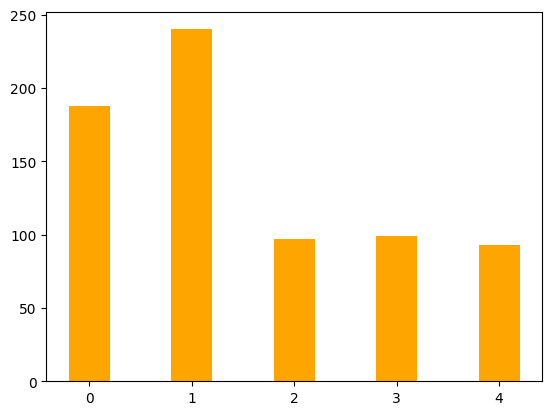

In [563]:
df_bar_plot = df_new_target["ESS"].value_counts()
keys = list(df_bar_plot.keys())
values = list(df_bar_plot.values)
plt.bar(keys, values, color ='orange', width = 0.4)


##### Step 1: Standardization

Standardizes the range of the continuous initial variables so that each one of them contributes equally to the analysis 
##### z = (x - u) / s


In [432]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df_new_data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df_new_data.columns)
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()


Scaled Dataset Using StandardScaler


/Users/archita/osa-ubc/my-env/lib/python3.11/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/archita/osa-ubc/my-env/lib/python3.11/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/archita/osa-ubc/my-env/lib/python3.11/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,mss_c3_spec_0p33_2p33_DxSpltMxd,mss_c3_spec_2p67_6p33_DxSpltMxd,mss_c3_spec_7p33_12p0_DxSpltMxd,mss_c3_spec_12p33_14p0_DxSpltMxd,mss_c3_spec_14p33_20p0_DxSpltMxd,mss_c3_spec_20p3_35p0_DxSpltMxd,mss_c3_spec_gt35_DxSpltMxd,mss_c4_spec_0p33_2p33_DxSpltMxd,mss_c4_spec_2p67_6p33_DxSpltMxd,mss_c4_spec_7p33_12p0_DxSpltMxd,...,mssBetaPwrC3Rel_1stSpltMxd,mssBetaPwrC4Rel_1stSpltMxd,mssBetaPwrRelC3C4av_1stSpltMxd,mssGammaPwrAbsC3C4av_1stSpltMxd,mssGammaPwrC3Rel_1stSpltMxd,mssGammaPwrC4Rel_1stSpltMxd,mssGammaPwrRelC3C4av_1stSpltMxd,mssDAratioC3_1stSpltMxd,mssDAratioC4_1stSpltMxd,mssDAratioC3C4av_1stSpltMxd
0,-0.583669,-0.811609,-0.881420,-0.988023,-0.928951,-0.322015,0.328570,NaN,NaN,NaN,...,1.265498,NaN,1.262456,1.136888,2.734068,NaN,2.668748,-0.176277,NaN,-0.177459
1,-0.319877,0.321879,-0.068901,-0.035038,-0.527350,-0.844860,-0.791890,-0.289635,0.419314,0.068701,...,-0.624478,-0.564646,-0.609669,-0.647600,-0.610604,-0.587157,-0.621840,-0.332504,-0.340698,-0.350693
2,-0.354284,-0.091511,-0.054892,-0.458587,-0.206069,0.200831,0.515314,-0.152842,0.103132,-0.299242,...,0.036949,-0.260353,-0.117723,0.244644,0.351164,0.038018,0.188005,-0.440885,-0.144179,-0.311397
3,0.047138,0.028506,-0.601241,-0.564475,-0.286390,-0.060592,0.702057,0.337329,0.242252,-0.582275,...,-0.492500,-0.638511,-0.582117,0.769493,0.067152,0.118118,0.091922,0.760112,1.043464,0.893685
4,-0.056085,0.575247,1.107850,0.070849,-0.045429,-0.583438,-0.605147,-0.107245,0.444609,1.158379,...,-0.634729,-0.527346,-0.595249,-0.385175,-0.532071,-0.437701,-0.502528,-0.544690,-0.569995,-0.573092


In [433]:
df_scaled.describe()

,mss_c3_spec_0p33_2p33_DxSpltMxd,mss_c3_spec_2p67_6p33_DxSpltMxd,mss_c3_spec_7p33_12p0_DxSpltMxd,mss_c3_spec_12p33_14p0_DxSpltMxd,mss_c3_spec_14p33_20p0_DxSpltMxd,mss_c3_spec_20p3_35p0_DxSpltMxd,mss_c3_spec_gt35_DxSpltMxd,mss_c4_spec_0p33_2p33_DxSpltMxd,mss_c4_spec_2p67_6p33_DxSpltMxd,mss_c4_spec_7p33_12p0_DxSpltMxd,...,mssBetaPwrC3Rel_1stSpltMxd,mssBetaPwrC4Rel_1stSpltMxd,mssBetaPwrRelC3C4av_1stSpltMxd,mssGammaPwrAbsC3C4av_1stSpltMxd,mssGammaPwrC3Rel_1stSpltMxd,mssGammaPwrC4Rel_1stSpltMxd,mssGammaPwrRelC3C4av_1stSpltMxd,mssDAratioC3_1stSpltMxd,mssDAratioC4_1stSpltMxd,mssDAratioC3C4av_1stSpltMxd
count,6.730000e+02,6.830000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.740000e+02,6.860000e+02,6.880000e+02,...,6.830000e+02,683.000000,7.100000e+02,7.170000e+02,6.830000e+02,6.830000e+02,7.100000e+02,6.830000e+02,6.830000e+02,7.100000e+02
mean,8.446273e-17,2.158677e-16,-1.553665e-16,3.780585e-16,8.286213e-17,4.143106e-17,-4.143106e-17,-8.433742e-17,2.252814e-16,-2.065531e-17,...,-1.040326e-16,0.000000,-1.401070e-16,2.972982e-17,1.560489e-17,8.322609e-17,-1.501147e-16,1.040326e-16,4.161304e-17,6.004586e-17
std,1.000744e+00,1.000733e+00,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00,1.000743e+00,1.000730e+00,1.000728e+00,...,1.000733e+00,1.000733,1.000705e+00,1.000698e+00,1.000733e+00,1.000733e+00,1.000705e+00,1.000733e+00,1.000733e+00,1.000705e+00
min,-9.392142e-01,-1.558378e+00,-1.105563e+00,-1.305685e+00,-1.491193e+00,-1.171639e+00,-9.786337e-01,-9.507964e-01,-1.553660e+00,-1.120038e+00,...,-1.133170e+00,-1.118263,-1.155689e+00,-7.525694e-01,-7.332458e-01,-6.731186e-01,-7.237304e-01,-8.719129e-01,-8.989604e-01,-9.040509e-01
25%,-5.607302e-01,-6.115819e-01,-5.977388e-01,-6.438900e-01,-6.879906e-01,-6.487934e-01,-6.051468e-01,-5.603689e-01,-5.798203e-01,-5.999647e-01,...,-6.348569e-01,-0.609554,-6.318777e-01,-4.901448e-01,-5.116303e-01,-4.743325e-01,-5.013399e-01,-5.235751e-01,-5.274652e-01,-5.356033e-01
50%,-2.854692e-01,-1.715217e-01,-3.140577e-01,-2.468129e-01,-2.863896e-01,-2.566592e-01,-2.316599e-01,-2.896346e-01,-1.751076e-01,-3.063177e-01,...,-2.854356e-01,-0.274341,-2.827132e-01,-2.802051e-01,-3.190615e-01,-3.009441e-01,-3.130008e-01,-2.862533e-01,-2.659465e-01,-2.685222e-01
75%,1.962377e-01,3.352142e-01,2.778203e-01,3.620386e-01,3.561721e-01,2.661863e-01,1.418270e-01,1.321410e-01,3.307834e-01,2.526730e-01,...,2.871951e-01,0.243448,2.540372e-01,1.396743e-01,1.085703e-01,5.999675e-02,9.865265e-02,1.529914e-01,1.567178e-01,1.550280e-01
max,9.555114e+00,9.536472e+00,8.644663e+00,1.065957e+01,6.701469e+00,7.455312e+00,9.292256e+00,9.046426e+00,8.892988e+00,7.738903e+00,...,8.308765e+00,7.736170,8.233387e+00,1.389072e+01,1.357924e+01,1.242332e+01,1.337306e+01,1.032725e+01,1.245522e+01,1.144444e+01


#### Dimensionality Reduction - PCA 
Missing Information in PCA 

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

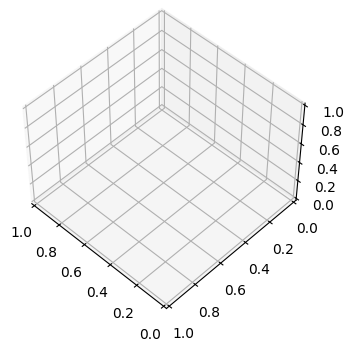

In [434]:
np.random.seed(5)

X = df_scaled
y = df_new_target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()
pca = decomposition.PCA(n_components=50)
pca.fit(X)
X = pca.transform(X)

plt.show()

#### Dimensionality Reduction - PPCA 

Leads to using PPCA (a. compute factors where some of the data are missing, b. interpolate data by using information from additional series) - https://github.com/allentran/pca-magic

- Fit the model with parameter d specifying the number of components and verbose printing convergence output if required.

In [441]:
df_scaled.columns

Index(['mss_c3_spec_0p33_2p33_DxSpltMxd', 'mss_c3_spec_2p67_6p33_DxSpltMxd',
       'mss_c3_spec_7p33_12p0_DxSpltMxd', 'mss_c3_spec_12p33_14p0_DxSpltMxd',
       'mss_c3_spec_14p33_20p0_DxSpltMxd', 'mss_c3_spec_20p3_35p0_DxSpltMxd',
       'mss_c3_spec_gt35_DxSpltMxd', 'mss_c4_spec_0p33_2p33_DxSpltMxd',
       'mss_c4_spec_2p67_6p33_DxSpltMxd', 'mss_c4_spec_7p33_12p0_DxSpltMxd',
       ...
       'mssBetaPwrC3Rel_1stSpltMxd', 'mssBetaPwrC4Rel_1stSpltMxd',
       'mssBetaPwrRelC3C4av_1stSpltMxd', 'mssGammaPwrAbsC3C4av_1stSpltMxd',
       'mssGammaPwrC3Rel_1stSpltMxd', 'mssGammaPwrC4Rel_1stSpltMxd',
       'mssGammaPwrRelC3C4av_1stSpltMxd', 'mssDAratioC3_1stSpltMxd',
       'mssDAratioC4_1stSpltMxd', 'mssDAratioC3C4av_1stSpltMxd'],
      dtype='object', length=762)

In [496]:
import os

import numpy as np
from scipy.linalg import orth


class PPCA():

    def __init__(self):

        self.raw = None
        self.data = None
        self.C = None
        self.means = None
        self.stds = None
        self.eig_vals = None
        self.vecs = None

    def _standardize(self, X):

        if self.means is None or self.stds is None:
            raise RuntimeError("Fit model first")

        return (X - self.means) / self.stds

    def fit(self, data, d=None, tol=1e-4, min_obs=10, verbose=False):

        self.raw = data
        self.raw[np.isinf(self.raw)] = np.max(self.raw[np.isfinite(self.raw)])

        valid_series = np.sum(~np.isnan(self.raw), axis=0) >= min_obs

        data = self.raw[:, valid_series].copy()
        N = data.shape[0]
        D = data.shape[1]

        self.means = np.nanmean(data, axis=0)
        self.stds = np.nanstd(data, axis=0)

        data = self._standardize(data)
        observed = ~np.isnan(data)
        missing = np.sum(~observed)
        data[~observed] = 0

        # initial

        if d is None:
            d = data.shape[1]
        
        if self.C is None:
            C = np.random.randn(D, d)
        else:
            C = self.C
        CC = np.dot(C.T, C)
        X = np.dot(np.dot(data, C), np.linalg.inv(CC))
        recon = np.dot(X, C.T)
        recon[~observed] = 0
        ss = np.sum((recon - data)**2)/(N*D - missing)

        v0 = np.inf
        counter = 0

        while True:

            Sx = np.linalg.inv(np.eye(d) + CC/ss)

            # e-step
            ss0 = ss
            if missing > 0:
                proj = np.dot(X, C.T)
                data[~observed] = proj[~observed]
            X = np.dot(np.dot(data, C), Sx) / ss

            # m-step
            XX = np.dot(X.T, X)
            C = np.dot(np.dot(data.T, X), np.linalg.pinv(XX + N*Sx))
            CC = np.dot(C.T, C)
            recon = np.dot(X, C.T)
            recon[~observed] = 0
            ss = (np.sum((recon-data)**2) + N*np.sum(CC*Sx) + missing*ss0)/(N*D)

            # calc diff for convergence
            det = np.log(np.linalg.det(Sx))
            if np.isinf(det):
                det = abs(np.linalg.slogdet(Sx)[1])
            v1 = N*(D*np.log(ss) + np.trace(Sx) - det) \
                + np.trace(XX) - missing*np.log(ss0)
            diff = abs(v1/v0 - 1)
            if verbose:
                print(diff)
            if (diff < tol) and (counter > 5):
                break

            counter += 1
            v0 = v1


        C = orth(C)
        vals, vecs = np.linalg.eig(np.cov(np.dot(data, C).T))
        order = np.flipud(np.argsort(vals))
        vecs = vecs[:, order]

        vals = vals[order]

        C = np.dot(C, vecs)

        # attach objects to class
        self.C = C
        self.data = data
        self.eig_vals = vals
        self.vecs = vecs
        self._calc_var()

    def transform(self, data=None):

        if self.C is None:
            raise RuntimeError('Fit the data model first.')
        if data is None:
            return np.dot(self.data, self.C)
        return np.dot(data, self.C)

    def _calc_var(self):

        if self.data is None:
            raise RuntimeError('Fit the data model first.')

        data = self.data.T

        # variance calc
        var = np.nanvar(data, axis=1)
        total_var = var.sum()
        self.var_exp = self.eig_vals.cumsum() / total_var

    def save(self, fpath):

        np.save(fpath, self.C)
        
    def load(self, fpath):

        assert os.path.isfile(fpath)

        self.C = np.load(fpath)

In [525]:
ppca = PPCA()

df_new_data = df_scaled.to_numpy()

ppca.fit(data=df_new_data, d=20, verbose=True)

ppca.save('mypcamodel')

/var/folders/0g/5jl4b1d12lvc6g70prn2_rnr0000gn/T/ipykernel_11400/679416042.py:24: RuntimeWarning: invalid value encountered in divide
  return (X - self.means) / self.stds


1.0
5.298433487773048
0.15933374430346015
0.03692896165069193
0.06423024531364918
0.05876487582386525
0.04991782035438852
0.042520235491510405
0.03693571736414791
0.032725331651375145
0.02936164119650453
0.026445720578600063
0.023756509365377765
0.021214920118875713
0.01882078448396618
0.016600715422871448
0.014579082383529562
0.012767674882580793
0.011165457541775559
0.009762000080849376
0.00854129606311882
0.007484780424783177
0.006573367769108995
0.005788692439851251
0.005113791229781395
0.004533425522897261
0.004034178164528113
0.0036044113703224134
0.0032341406061836553
0.002914861565065485
0.0026393572632690265
0.002401505309901575
0.002196099234692994
0.0020186919259491676
0.001865464205704881
0.0017331178933133184
0.0016187905452947904
0.0015199881744186738
0.0014345322194480037
0.001360517450058163
0.0012962780654698358
0.0012403598280351646
0.0011914965988991666
0.0011485900905289226
0.001110692010776515
0.0010769880464509551
0.0010467833238071433
0.0010194891055529398
0.0009

##### Accurate Number of Principal Components
The optimal number of principal components is reached when the cumulative variance stops growing fast: https://www.baeldung.com/cs/pca 

##### cumsum = np.cumsum(pca.explained_variance_ratio_)

In [526]:
# Calculate the eigenvalues and eigenvectors
eig_vals = ppca.eig_vals

# # Calculate the total variance
total_var = df_scaled.var().sum()
print(f"Total variance: {total_var:.2f}")

# Calculate the sum of the eigenvalues
eig_vals_sum = eig_vals.sum()
print(f"Sum of eigenvalues: {eig_vals_sum:.2f}")
# assert eig_vals_sum.round(2) == total_var.round(2)

# Calculate the proportion of variance explained by each principal component
var_exp = eig_vals / total_var
print(f"Proportion of variance explained by each principal component:\n{var_exp}")



Total variance: 610.29
Sum of eigenvalues: 514.52
Proportion of variance explained by each principal component:
[0.1784843  0.14346943 0.09693664 0.07691357 0.04890403 0.03761699
 0.03363286 0.03208432 0.02852151 0.02392182 0.02084175 0.01990465
 0.01733475 0.01511387 0.01398138 0.0131998  0.01249051 0.01170188
 0.00992693 0.00809705]


In [527]:
var_exp.sum()


np.float64(0.8430780434834436)

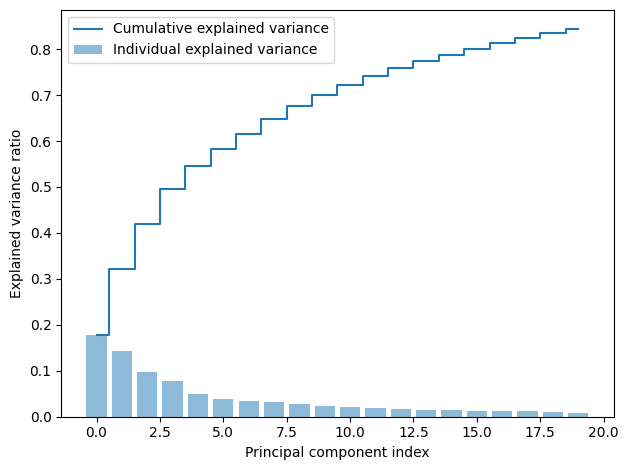

In [528]:
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Training the Model 

- split: train, validation and test
- Multi class classification models: https://scikit-learn.org/1.5/modules/multiclass.html

    - naive_bayes.BernoulliNB
    - tree.DecisionTreeClassifier
    - tree.ExtraTreeClassifier
    - ensemble.ExtraTreesClassifier
    - naive_bayes.GaussianNB
    - neighbors.KNeighborsClassifier
    - semi_supervised.LabelPropagation
    - semi_supervised.LabelSpreading
    - discriminant_analysis.LinearDiscriminantAnalysis
    - svm.LinearSVC (setting multi_class=”crammer_singer”)
    - linear_model.LogisticRegression (with most solvers)
    - linear_model.LogisticRegressionCV (with most solvers)
    - neural_network.MLPClassifier
    - neighbors.NearestCentroid
    - discriminant_analysis.QuadraticDiscriminantAnalysis
    - neighbors.RadiusNeighborsClassifier
    - ensemble.RandomForestClassifier
    - linear_model.RidgeClassifier
    - linear_model.RidgeClassifierCV